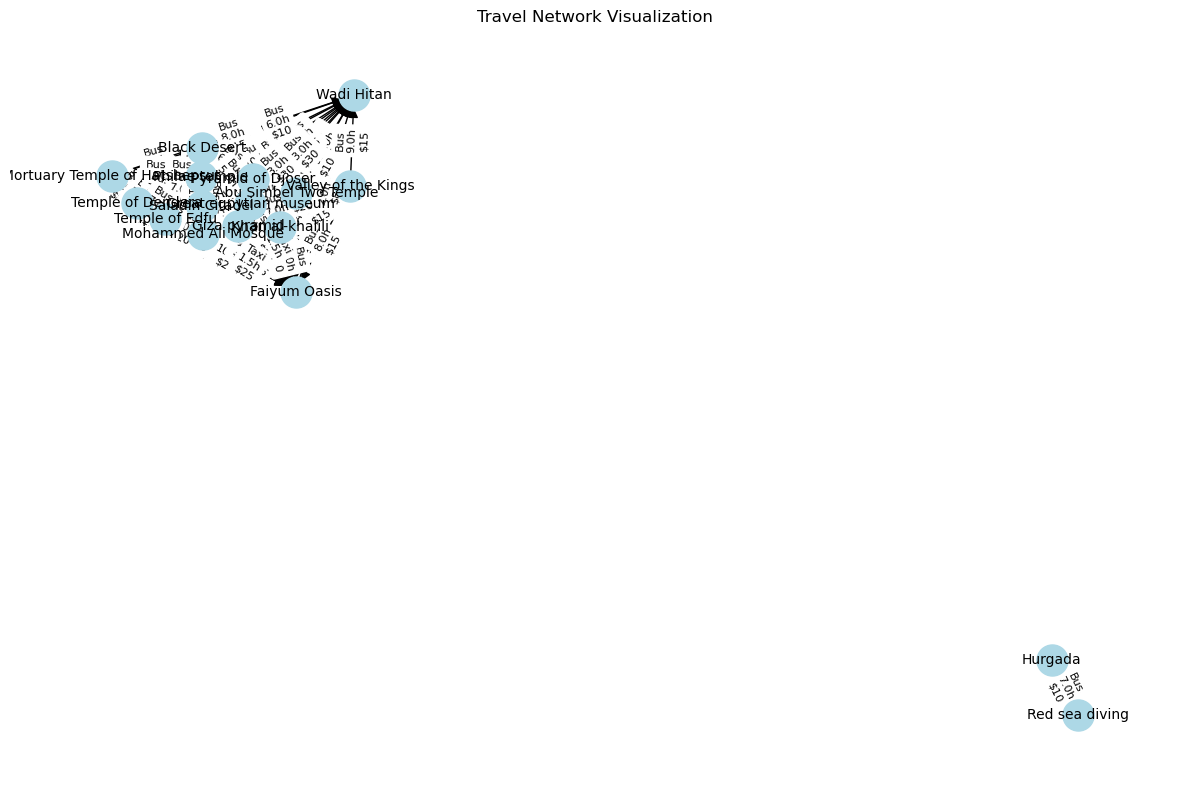


Available destinations:
1. Red sea diving
2. Hurgada
3. Giza pyramid
4. Great egpytian museum
5. Mohammed Ali Mosque
6. Saladin Citadel
7. Pyramid of Djoser
8. Khan al-khalili
9. Philae temple
10. Abu Simbel Two Temple
11. Temple of Edfu
12. Temple of Dendera
13. Valley of the Kings
14. Mortuary Temple of Hatshepsut
15. Black Desert
16. Faiyum Oasis

Available direct connections:

From Hurgada to:
  → Red sea diving (Bus, 7.0 hours, $10)

From Abu Simbel Two Temple to:
  → Temple of Edfu (Bus, 5.0 hours, $15)
  → Temple of Dendera (Bus, 8.0 hours, $20)
  → Valley of the Kings (Bus, 7.0 hours, $20)
  → Mortuary Temple of Hatshepsut (Bus, 6.0 hours, $15)
  → Black Desert (Bus, 14.0 hours, $40)
  → Faiyum Oasis (Bus, 14.0 hours, $40)
  → Wadi Hitan (Bus, 14.0 hours, $40)

From Temple of Dendera to:
  → Valley of the Kings (Bus, 1.5 hours, $8)
  → Mortuary Temple of Hatshepsut (Bus, 1.5 hours, $8)
  → Black Desert (Bus, 8.0 hours, $10)
  → Faiyum Oasis (Bus, 7.0 hours, $10)
  → Wadi Hitan

 3


Select destination (enter number):


 10



Checking routes from Giza pyramid to Abu Simbel Two Temple...
Found 64 possible route(s)

Available routes:

Route 1:
  Giza pyramid → Great egpytian museum (Taxi, 0.16 hours, $2)
  Great egpytian museum → Mohammed Ali Mosque (Taxi, 0.5 hours, $5)
  Mohammed Ali Mosque → Saladin Citadel (Taxi, 0.5 hours, $5)
  Saladin Citadel → Pyramid of Djoser (Taxi, 0.6 hours, $6)
  Pyramid of Djoser → Khan al-khalili (Taxi, 1.0 hours, $30)
  Khan al-khalili → Philae temple (Airplane, 2.0 hours, $80)
  Philae temple → Abu Simbel Two Temple (Airplane, 1.0 hours, $70)
  Total: 5.76 hours, $198

Route 2:
  Giza pyramid → Great egpytian museum (Taxi, 0.16 hours, $2)
  Great egpytian museum → Mohammed Ali Mosque (Taxi, 0.5 hours, $5)
  Mohammed Ali Mosque → Saladin Citadel (Taxi, 0.5 hours, $5)
  Saladin Citadel → Pyramid of Djoser (Taxi, 0.6 hours, $6)
  Pyramid of Djoser → Khan al-khalili (Taxi, 1.0 hours, $30)
  Khan al-khalili → Abu Simbel Two Temple (Bus, 14.0 hours, $40)
  Total: 16.76 hours, $88


 y



Select must-visit cities (enter numbers separated by commas, e.g., 1,3,4):


 1,3,4



Planning multi-city route through: ['Red sea diving', 'Giza pyramid', 'Great egpytian museum']

No valid multi-city routes found

Would you like to plan another route? (y/n)


 y



Select starting point (enter number, or 0 to exit):


 6


Select destination (enter number):


 1



Checking routes from Saladin Citadel to Red sea diving...

No direct path found between Saladin Citadel and Red sea diving
Available connections from Saladin Citadel: ['Pyramid of Djoser', 'Khan al-khalili', 'Philae temple', 'Abu Simbel Two Temple', 'Temple of Edfu', 'Temple of Dendera', 'Valley of the Kings', 'Mortuary Temple of Hatshepsut', 'Black Desert', 'Faiyum Oasis', 'Wadi Hitan']
Available connections to Red sea diving: ['Hurgada']

Would you like to plan a multi-city route? (y/n)


 y



Select must-visit cities (enter numbers separated by commas, e.g., 1,3,4):


 3,8



Planning multi-city route through: ['Giza pyramid', 'Khan al-khalili']

No valid multi-city routes found

Would you like to plan another route? (y/n)


 y



Select starting point (enter number, or 0 to exit):


 3


Select destination (enter number):


 15



Checking routes from Giza pyramid to Black Desert...
Found 2048 possible route(s)

Available routes:

Route 1:
  Giza pyramid → Great egpytian museum (Taxi, 0.16 hours, $2)
  Great egpytian museum → Mohammed Ali Mosque (Taxi, 0.5 hours, $5)
  Mohammed Ali Mosque → Saladin Citadel (Taxi, 0.5 hours, $5)
  Saladin Citadel → Pyramid of Djoser (Taxi, 0.6 hours, $6)
  Pyramid of Djoser → Khan al-khalili (Taxi, 1.0 hours, $30)
  Khan al-khalili → Philae temple (Airplane, 2.0 hours, $80)
  Philae temple → Abu Simbel Two Temple (Airplane, 1.0 hours, $70)
  Abu Simbel Two Temple → Temple of Edfu (Bus, 5.0 hours, $15)
  Temple of Edfu → Temple of Dendera (Bus, 4.0 hours, $15)
  Temple of Dendera → Valley of the Kings (Bus, 1.5 hours, $8)
  Valley of the Kings → Mortuary Temple of Hatshepsut (Taxi, 0.2 hours, $5)
  Mortuary Temple of Hatshepsut → Black Desert (Bus, 8.0 hours, $15)
  Total: 24.459999999999997 hours, $256

Route 2:
  Giza pyramid → Great egpytian museum (Taxi, 0.16 hours, $2)
  Gre

 n



Would you like to plan another route? (y/n)


 n


In [18]:
import simpy
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random
from collections import defaultdict
import itertools

class Transport:
    def __init__(self, env, from_place, to_place, method, period, price, capacity=50):
        self.env = env
        self.from_place = from_place
        self.to_place = to_place
        self.method = method
        self.period = period
        self.price = price
        self.capacity = capacity
        self.passengers = 0
        self.resource = simpy.Resource(env, capacity=capacity)

class Passenger:
    def __init__(self, env, name, start, end):
        self.env = env
        self.name = name
        self.start = start
        self.end = end
        self.total_time = 0
        self.total_cost = 0
        self.path = []

class TravelPlanner:
    def __init__(self, excel_file):
        """Initialize travel planner with data from Excel file"""
        self.env = simpy.Environment()
        try:
            self.df = pd.read_excel(excel_file, sheet_name='Transportation List')
            
            # Validate required columns
            required_columns = [
                'Place', 
                'To', 
                'Transportation', 
                'Transportation Period(Hour)',
                'Price($)'
            ]
            
            for col in required_columns:
                if col not in self.df.columns:
                    raise ValueError(f"Missing required column: {col}")
            
            self.graph = nx.DiGraph()
            self.transports = {}
            self.build_network()
            
        except Exception as e:
            print(f"Error initializing TravelPlanner: {str(e)}")
            print("\nExpected Excel file format:")
            print("Required columns:", required_columns)
            print("Current columns in file:", list(self.df.columns))
            raise

    def build_network(self):
        """Build network from Excel data"""
        try:
            # Add all places as nodes
            places = set(self.df['Place'].unique()) | set(self.df['To'].unique())
            for place in places:
                self.graph.add_node(place)
            
            # Add connections as edges with attributes
            for _, row in self.df.iterrows():
                self.graph.add_edge(
                    row['Place'], 
                    row['To'], 
                    transport=row['Transportation'],
                    period=row['Transportation Period(Hour)'],
                    price=row['Price($)']
                )
                
                # Create transport object for simulation
                transport_key = (row['Place'], row['To'])
                self.transports[transport_key] = Transport(
                    self.env,
                    row['Place'],
                    row['To'],
                    row['Transportation'],
                    row['Transportation Period(Hour)'],
                    row['Price($)']
                )
        except Exception as e:
            print(f"Error building network: {str(e)}")
            print("\nDataFrame head:")
            print(self.df.head())
            print("\nColumns:", list(self.df.columns))
            raise

    def visualize_network(self):
        """Visualize the travel network"""
        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(self.graph, seed=42)
    
        # Draw nodes
        nx.draw_networkx_nodes(self.graph, pos, node_size=500, node_color='lightblue')
    
        # Draw edges
        nx.draw_networkx_edges(self.graph, pos, arrowsize=15)
    
        # Add labels
        nx.draw_networkx_labels(self.graph, pos, font_size=10)
    
        # Add edge labels with transport, period and price
        edge_labels = {(u, v): f"{d['transport']}\n{d['period']}h\n${d['price']}" 
                    for u, v, d in self.graph.edges(data=True)}
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_size=8)
    
        plt.title("Travel Network Visualization")
        plt.axis('off')  # Fixed: removed 'lt'
        plt.tight_layout()
        plt.savefig('travel_network.png')
        plt.show()

    def passenger_trip(self, passenger, path):
        """Simulate a passenger's journey through the network"""
        while True:  # SimPy process needs to be a generator
            try:
                for i in range(len(path) - 1):
                    current = path[i]
                    next_stop = path[i + 1]
                    transport_key = (current, next_stop)
                    transport = self.transports[transport_key]

                    # Request transport
                    with transport.resource.request() as request:
                        yield request
                        transport.passengers += 1

                        # Travel time
                        yield self.env.timeout(transport.period)
                        
                        transport.passengers -= 1
                        passenger.total_time += transport.period
                        passenger.total_cost += transport.price
                        passenger.path.append((current, next_stop, transport.method))
                break  # Exit the while loop after completing the journey
            except Exception as e:
                print(f"Error in passenger trip: {e}")
                break

    def simulate_travel(self, start, end, num_passengers=10, simulation_time=168):
        """Simulate multiple passengers traveling through the network"""
        paths = self.find_all_paths(start, end)
        if not paths:
            print(f"No paths found between {start} and {end}")
            return []

        results = []
        
        def passenger_generator():
            for i in range(num_passengers):
                try:
                    passenger = Passenger(self.env, f"Passenger_{i}", start, end)
                    path = random.choice(paths)
                    self.env.process(self.passenger_trip(passenger))
                    yield self.env.timeout(random.uniform(0, 24))  # Random departure times
                    results.append(passenger)
                except Exception as e:
                    print(f"Error generating passenger {i}: {e}")

        self.env.process(passenger_generator())
        try:
            self.env.run(until=simulation_time)
        except Exception as e:
            print(f"Error in simulation: {e}")

        return results

    def simulate_multi_city_travel(self, must_visit, num_passengers=5, simulation_time=168):
        """Simulate multi-city travel"""
        if len(must_visit) < 2:
            return []

        start = must_visit[0]
        end = must_visit[-1]
        
        # Generate valid paths that include all must-visit cities
        all_paths = []
        try:
            path_metrics = self.generate_multi_city_plans(must_visit)
            if path_metrics:
                all_paths = [plan['path'] for plan in path_metrics]
        except Exception as e:
            print(f"Error generating paths: {e}")
            return []

        if not all_paths:
            print(f"No valid paths found through {must_visit}")
            return []

        results = []
        
        def multi_city_passenger_generator():
            for i in range(num_passengers):
                try:
                    passenger = Passenger(self.env, f"MultiCity_Passenger_{i}", 
                                       start, end)
                    path = random.choice(all_paths)
                    self.env.process(self.passenger_trip(passenger))
                    yield self.env.timeout(random.uniform(0, 24))
                    results.append(passenger)
                except Exception as e:
                    print(f"Error generating multi-city passenger {i}: {e}")

        self.env.process(multi_city_passenger_generator())
        try:
            self.env.run(until=simulation_time)
        except Exception as e:
            print(f"Error in multi-city simulation: {e}")

        return results

    def get_all_places(self):
        return list(self.graph.nodes())
    
    def find_shortest_path(self, start, end, metric='period'):
        if metric not in ['period', 'price']:
            raise ValueError("Metric must be either 'period' or 'price'")
        
        try:
            path = nx.shortest_path(self.graph, start, end, weight=metric)
            path_edges = list(zip(path[:-1], path[1:]))
            total_weight = sum(self.graph[u][v][metric] for u, v in path_edges)
            transport_methods = [self.graph[u][v]['transport'] for u, v in path_edges]
            
            return {
                'path': path,
                f'total_{metric}': total_weight,
                'transport': transport_methods
            }
        except (nx.NetworkXNoPath, nx.NodeNotFound):
            return None

    def find_all_paths(self, start, end, cutoff=None):
        """Find all simple paths from start to end"""
        try:
            paths = list(nx.all_simple_paths(self.graph, start, end, cutoff=cutoff))
            if not paths:
                # Get available connections for debugging
                start_connections = list(self.graph.neighbors(start))
                end_connections = list(self.graph.predecessors(end))
                print(f"\nNo direct path found between {start} and {end}")
                print(f"Available connections from {start}: {start_connections}")
                print(f"Available connections to {end}: {end_connections}")
            return paths
        except (nx.NetworkXNoPath, nx.NodeNotFound) as e:
            print(f"Error finding paths: {e}")
            print("Please check if both locations are connected in the network.")
            return []

    def show_available_connections(self):
        """Show all available connections in the network"""
        print("\nAvailable direct connections:")
        for source in self.graph.nodes():
            connections = list(self.graph.neighbors(source))
            if connections:
                print(f"\nFrom {source} to:")
                for dest in connections:
                    edge_data = self.graph[source][dest]
                    print(f"  → {dest} ({edge_data['transport']}, "
                          f"{edge_data['period']} hours, ${edge_data['price']})")
    
    def calculate_path_metrics(self, path):
        if len(path) < 2:
            return None
        
        path_edges = list(zip(path[:-1], path[1:]))
        total_period = sum(self.graph[u][v]['period'] for u, v in path_edges)
        total_price = sum(self.graph[u][v]['price'] for u, v in path_edges)
        transport_methods = [self.graph[u][v]['transport'] for u, v in path_edges]
        
        return {
            'path': path,
            'total_period': total_period,
            'total_price': total_price,
            'transport_methods': transport_methods
        }

    def get_optimal_travel_plans(self, start, end, cutoff=7, top_n=7):
        all_paths = self.find_all_paths(start, end, cutoff)
        if not all_paths:
            return {'fastest': [], 'cheapest': [], 'balanced': []}

        path_metrics = [self.calculate_path_metrics(path) for path in all_paths]
        fastest_plans = sorted(path_metrics, key=lambda x: x['total_period'])[:top_n]
        cheapest_plans = sorted(path_metrics, key=lambda x: x['total_price'])[:top_n]
        
        max_period = max(plan['total_period'] for plan in path_metrics)
        max_price = max(plan['total_price'] for plan in path_metrics)
        
        for plan in path_metrics:
            plan['normalized_score'] = (plan['total_period'] / max_period) + (plan['total_price'] / max_price)
        
        balanced_plans = sorted(path_metrics, key=lambda x: x['normalized_score'])[:top_n]
        
        return {
            'fastest': fastest_plans,
            'cheapest': cheapest_plans,
            'balanced': balanced_plans
        }

    def simulate_multi_city_travel(self, must_visit, num_passengers=5, simulation_time=168):
        plans = self.generate_multi_city_plans(must_visit)
        if not plans:
            return []

        results = []
        
        def multi_city_passenger_generator():
            for i in range(num_passengers):
                passenger = Passenger(self.env, f"MultiCity_Passenger_{i}", 
                                   must_visit[0], must_visit[-1])
                plan = random.choice(plans)
                path = plan['path']
                self.env.process(self.passenger_trip(passenger, path))
                yield self.env.timeout(random.uniform(0, 24))
                results.append(passenger)

        self.env.process(multi_city_passenger_generator())
        self.env.run(until=simulation_time)
        return results

    def generate_multi_city_plans(self, must_visit, optional_visit=None, start=None, end=None, max_cities=8):
        if optional_visit is None:
            optional_visit = []
        
        if start is None:
            start = must_visit[0] if must_visit else None
        if end is None:
            end = must_visit[-1] if must_visit else start
        
        if start is None or end is None:
            return []
        
        must_visit_set = set(must_visit)
        if start not in must_visit_set:
            must_visit = [start] + must_visit
        if end not in must_visit_set and end != start:
            must_visit = must_visit + [end]
        
        must_visit_set = set(must_visit)
        remaining_cities = set(self.get_all_places()) - must_visit_set
        optional_cities = set(optional_visit) & remaining_cities
        other_cities = remaining_cities - optional_cities
        
        max_additional = max(0, max_cities - len(must_visit))
        plans = []
        
        for n in range(min(max_additional + 1, len(optional_cities) + 1)):
            for opt_combo in itertools.combinations(optional_cities, n):
                remaining = max_additional - n
                if remaining > 0:
                    for other_combo in itertools.combinations(other_cities, min(remaining, len(other_cities))):
                        city_set = list(must_visit_set | set(opt_combo) | set(other_combo))
                        plans.extend(self._evaluate_city_combination(city_set, start, end))
                else:
                    city_set = list(must_visit_set | set(opt_combo))
                    plans.extend(self._evaluate_city_combination(city_set, start, end))
        
        for plan in plans:
            plan['balanced_score'] = plan['total_period'] * 0.5 + plan['total_price'] * 0.5
        
        return sorted(plans, key=lambda x: x['balanced_score'])[:10]

    def _evaluate_city_combination(self, cities, start, end):
        cities = [city for city in cities if city in self.graph]
        if not cities or start not in cities or end not in cities:
            return []
        
        cities_to_permute = [city for city in cities if city != start and city != end]
        permutations = list(itertools.permutations(cities_to_permute))
        plans = []
        
        for perm in permutations:
            path = [start] + list(perm) + [end]
            valid = all(self.graph.has_edge(path[i], path[i+1]) 
                       for i in range(len(path) - 1))
            if valid:
                metrics = self.calculate_path_metrics(path)
                if metrics:
                    plans.append(metrics)
        
        return plans

def analyze_simulation_results(planner, start, end, num_passengers=10):
    """Analyze and display simulation results"""
    try:
        results = planner.simulate_travel(start, end, num_passengers)
        
        if not results:
            print(f"\nNo valid results for route from {start} to {end}")
            return
        
        print(f"\nSimulation Results for {start} to {end}:")
        print(f"Number of passengers: {len(results)}")
        
        completed_trips = [p for p in results if p.path]  # Only consider completed trips
        
        if not completed_trips:
            print("No completed trips in simulation")
            return
            
        avg_time = sum(p.total_time for p in completed_trips) / len(completed_trips)
        avg_cost = sum(p.total_cost for p in completed_trips) / len(completed_trips)
        
        print(f"Average travel time: {avg_time:.2f} hours")
        print(f"Average cost: ${avg_cost:.2f}")
        
        print("\nSample passenger itineraries:")
        for passenger in completed_trips[:3]:
            print(f"\n{passenger.name}:")
            print(f"Total time: {passenger.total_time} hours")
            print(f"Total cost: ${passenger.total_cost}")
            print("Route:", ' -> '.join(f"{start}({transport})" 
                  for start, end, transport in passenger.path))
    
    except Exception as e:
        print(f"Error in analysis: {e}")

def main():
    excel_file = 'C:/Users/evehyh/Downloads/Egypt.xlsx'
    try:
        planner = TravelPlanner(excel_file)
        
        # Show network visualization
        planner.visualize_network()
        
        # Get all available places from Excel
        places = list(planner.df['Place'].unique())
        print("\nAvailable destinations:")
        for i, place in enumerate(places, 1):
            print(f"{i}. {place}")
        
        # Show all available connections
        planner.show_available_connections()
        
        if len(places) >= 2:
            while True:
                try:
                    # Select start and end points
                    print("\nSelect starting point (enter number, or 0 to exit):")
                    start_idx = int(input()) - 1
                    if start_idx == -1:
                        break
                    start = places[start_idx]
                    
                    print("Select destination (enter number):")
                    end_idx = int(input()) - 1
                    end = places[end_idx]
                    
                    print(f"\nChecking routes from {start} to {end}...")
                    paths = planner.find_all_paths(start, end)
                    
                    if paths:
                        print(f"Found {len(paths)} possible route(s)")
                        print("\nAvailable routes:")
                        for i, path in enumerate(paths, 1):
                            print(f"\nRoute {i}:")
                            total_time = 0
                            total_cost = 0
                            for j in range(len(path)-1):
                                edge_data = planner.graph[path[j]][path[j+1]]
                                print(f"  {path[j]} → {path[j+1]} "
                                      f"({edge_data['transport']}, "
                                      f"{edge_data['period']} hours, "
                                      f"${edge_data['price']})")
                                total_time += edge_data['period']
                                total_cost += edge_data['price']
                            print(f"  Total: {total_time} hours, ${total_cost}")
                        
                        print("\nSimulating travel...")
                        analyze_simulation_results(planner, start, end)
                    
                    # Multi-city planning
                    print("\nWould you like to plan a multi-city route? (y/n)")
                    if input().lower().startswith('y'):
                        print("\nSelect must-visit cities (enter numbers separated by commas, e.g., 1,3,4):")
                        selected_indices = [int(x.strip()) - 1 for x in input().split(',')]
                        must_visit = [places[i] for i in selected_indices if 0 <= i < len(places)]
                        
                        if len(must_visit) >= 2:
                            print(f"\nPlanning multi-city route through: {must_visit}")
                            multi_city_results = planner.simulate_multi_city_travel(must_visit)
                            
                            if multi_city_results:
                                print("\nMulti-city simulation results:")
                                for passenger in multi_city_results[:3]:
                                    print(f"\n{passenger.name}:")
                                    print(f"Total time: {passenger.total_time} hours")
                                    print(f"Total cost: ${passenger.total_cost}")
                                    print("Route:", ' -> '.join(f"{p[0]}({p[2]})" 
                                          for p in passenger.path))
                            else:
                                print("\nNo valid multi-city routes found")
                        else:
                            print("\nNot enough cities selected for multi-city routing")
                    
                    print("\nWould you like to plan another route? (y/n)")
                    if not input().lower().startswith('y'):
                        break
                        
                except ValueError as e:
                    print(f"Invalid input: {e}")
                except IndexError:
                    print("Invalid selection. Please choose a number from the list.")
                except Exception as e:
                    print(f"Error: {e}")
                    break
    
    except Exception as e:
        print(f"Error in main: {e}")
        print("\nPlease check your Excel file format and column names.")

if __name__ == "__main__":
    main()